# Breast Histopathology Images CNN-DL

## Proje [linki](https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images)

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n'

In [83]:
import os

path = '/kaggle/input/breast-histopathology-images/'

folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

print(folders)

['10295', '10304', '12868', '10274', '12818', '14190', '12869', '9323', '10291', '12906', '9176', '8984', '10299', '12930', '9344', '12935', '12894', '12909', '9381', '9346', '9175', '10262', '8980', '16896', '12241', '12910', '13617', '13401', '12891', '10300', '9076', '10259', '9124', '13402', '12870', '16550', '10255', '9261', '15471', '12931', '12955', '10258', '13461', '13023', '9260', '8957', '9035', '10268', '13403', '10288', '9262', '12911', '9319', '10254', '13616', '10253', '8974', '9135', '10257', '9291', '9320', '14209', '14078', '12749', '9043', '9041', '8975', '9075', '13025', '13021', '13458', '12901', '16552', '13688', '15902', '13692', '12879', '9073', '15514', '9325', '10277', '12810', '8864', '8917', '14305', '16167', '13022', '16555', '12932', '14189', '8867', '16166', '10290', '9083', '15840', '12907', '12880', '12908', '13693', '13591', '15516', '9228', '14192', '12949', '10306', '9345', '14156', '12872', '9123', '13019', '9226', '14304', '10260', '14154', '15472'

In [84]:
folders.sort()
folders[:20]

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278']

In [85]:
folders[-5:]

['9347', '9381', '9382', '9383', 'IDC_regular_ps50_idx5']

In [86]:
folders.pop(len(folders)-1)

'IDC_regular_ps50_idx5'

In [87]:
len(folders)

279

In [88]:
train_path = "/kaggle/input/breast-histopathology-images/10253"
test_path = "/kaggle/input/breast-histopathology-images/"+folders[len(folders)-1]

In [89]:
test_path

'/kaggle/input/breast-histopathology-images/9383'

In [90]:
import cv2
img = cv2.imread("/kaggle/input/breast-histopathology-images/10253/0/10253_idx5_x1001_y1001_class0.png")
img.shape

(50, 50, 3)

In [91]:
height = 50
width = 50
batch_size = 32
seed = 73

In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(test_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 440 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [93]:
aziz_label = ["normal", "cancer"]

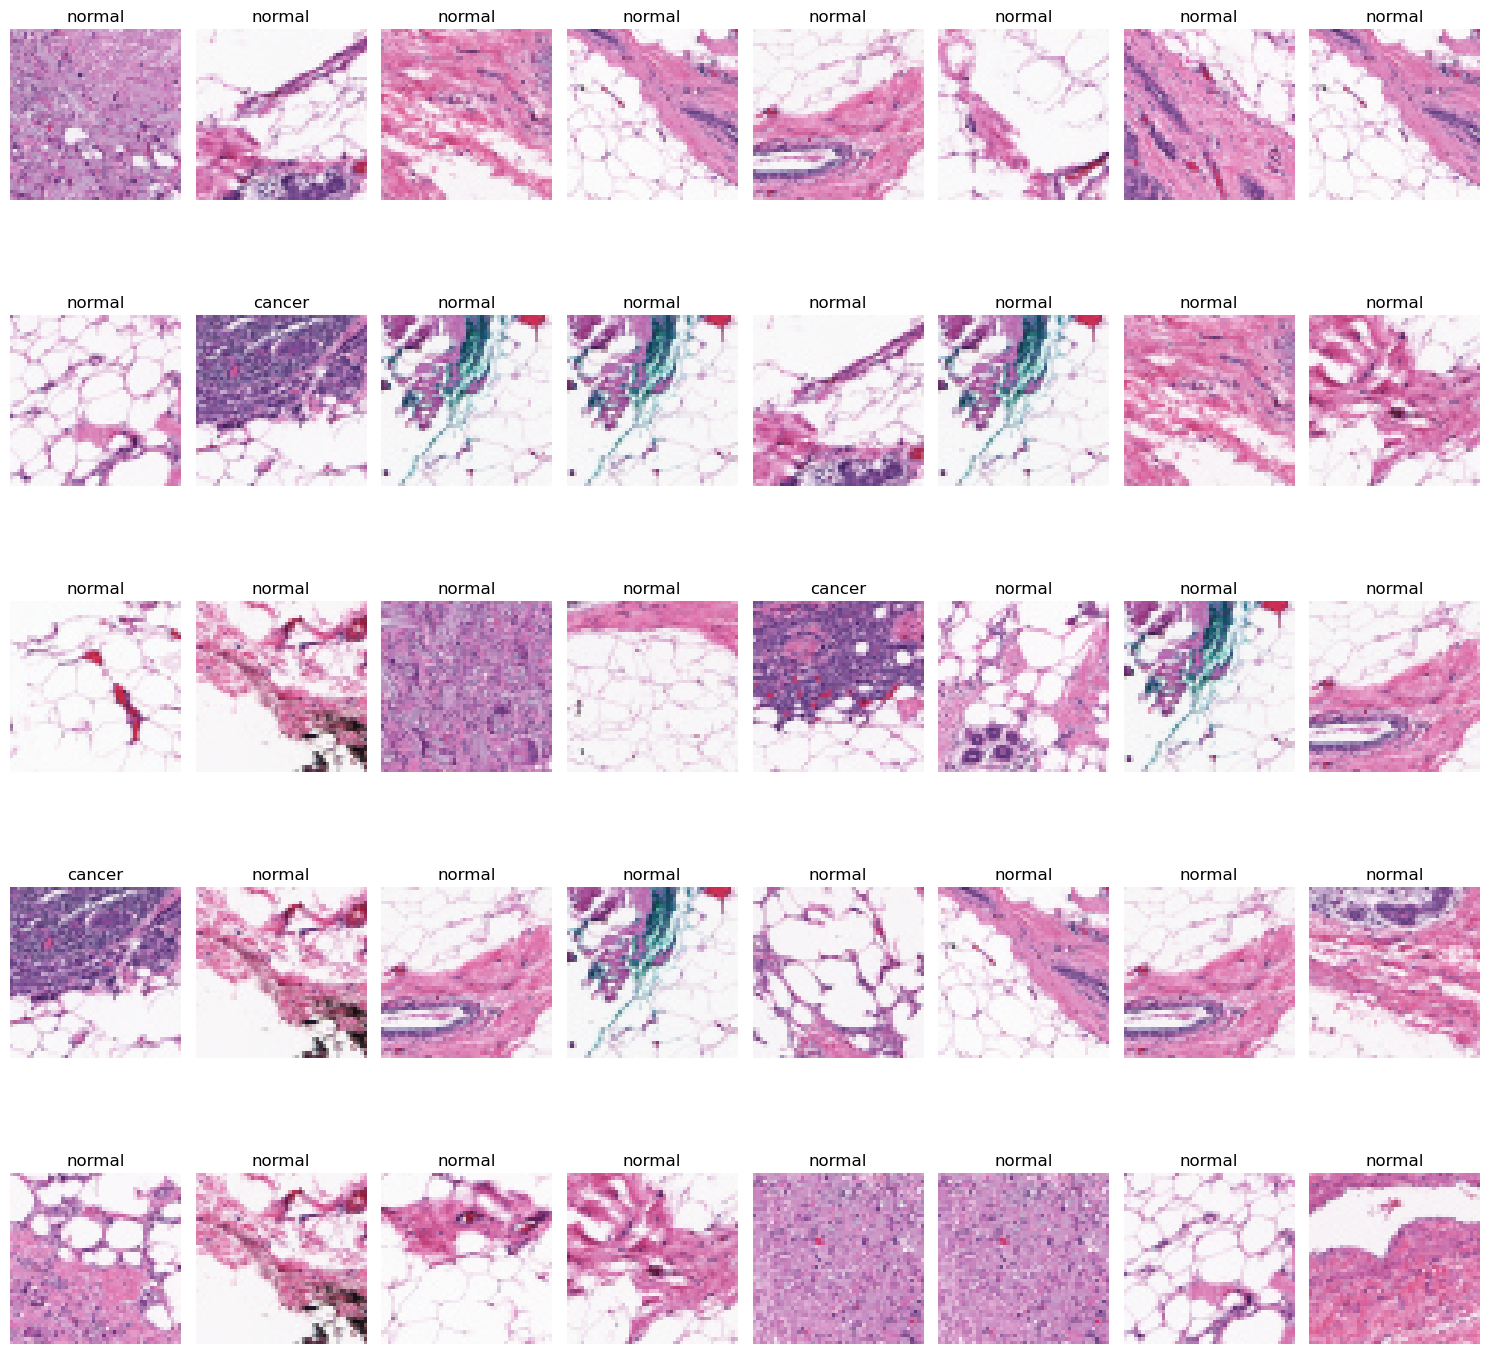

In [128]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt

r_num = 5
c_num = 8
fig,ax = plt.subplots(r_num,c_num)
fig.set_size_inches(15,15)
img,y = train_dataset.next()
for i in range(r_num):
    for j in range (c_num):
        aziz = rn.randint(0,batch_size-1)
        label = list(train_dataset.class_indices.keys())[np.argmax(y[aziz])]
        ax[i,j].imshow(img[aziz])
        ax[i,j].set_title(aziz_label[int(label)])
        ax[i,j].axis('off') ## axis leri silmek için bunu yazdım.

plt.tight_layout()
plt.savefig('breast_cancer.png')

## Derin Öğrenme ve CNN(Computational Neural Network)

In [95]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [96]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(2, activation='softmax') # 515 tür var ondan dense 2 olarak belirledim 
])

In [97]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 46, 46, 128)       9728      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 23, 23, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                      

In [98]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [99]:
epochs = 5
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=epochs, validation_data=test_dataset, validation_steps=len(test_dataset))

Epoch 1/5
14/14 [==============================] - 6s 285ms/step - loss: 0.7790 - accuracy: 0.7136 - val_loss: 3.4216 - val_accuracy: 0.1250
Epoch 2/5
14/14 [==============================] - 4s 276ms/step - loss: 0.4259 - accuracy: 0.8523 - val_loss: 2.8879 - val_accuracy: 0.0714
Epoch 3/5
14/14 [==============================] - 4s 282ms/step - loss: 0.2810 - accuracy: 0.9159 - val_loss: 0.4201 - val_accuracy: 0.8750
Epoch 4/5
14/14 [==============================] - 4s 279ms/step - loss: 0.2225 - accuracy: 0.9295 - val_loss: 0.4223 - val_accuracy: 0.8750
Epoch 5/5
14/14 [==============================] - 4s 262ms/step - loss: 0.1811 - accuracy: 0.9500 - val_loss: 0.3733 - val_accuracy: 0.8750


In [100]:
"""
myVars = vars()
myVars[("train_dataset"+str(i))]
"""

'\nmyVars = vars()\nmyVars[("train_dataset"+str(i))]\n'

In [101]:
path

'/kaggle/input/breast-histopathology-images/'

In [102]:
folders[:5]

['10253', '10254', '10255', '10256', '10257']

In [103]:
len(folders)

279

In [104]:
for i in range(1,(len(folders)-1)):
    print(i)
    myVars = vars()
    myVars[("train_path"+str(i))] = path + folders[i]
    print(myVars[("train_path"+str(i))])

1
/kaggle/input/breast-histopathology-images/10254
2
/kaggle/input/breast-histopathology-images/10255
3
/kaggle/input/breast-histopathology-images/10256
4
/kaggle/input/breast-histopathology-images/10257
5
/kaggle/input/breast-histopathology-images/10258
6
/kaggle/input/breast-histopathology-images/10259
7
/kaggle/input/breast-histopathology-images/10260
8
/kaggle/input/breast-histopathology-images/10261
9
/kaggle/input/breast-histopathology-images/10262
10
/kaggle/input/breast-histopathology-images/10264
11
/kaggle/input/breast-histopathology-images/10268
12
/kaggle/input/breast-histopathology-images/10269
13
/kaggle/input/breast-histopathology-images/10272
14
/kaggle/input/breast-histopathology-images/10273
15
/kaggle/input/breast-histopathology-images/10274
16
/kaggle/input/breast-histopathology-images/10275
17
/kaggle/input/breast-histopathology-images/10276
18
/kaggle/input/breast-histopathology-images/10277
19
/kaggle/input/breast-histopathology-images/10278
20
/kaggle/input/brea

In [105]:
for i in range(1,(len(folders)-1)):
    print(i)
    myVars = vars()
    train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
    myVars[("train_dataset"+str(i))] = train_datagen.flow_from_directory(myVars[("train_path"+str(i))],
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

1
Found 679 images belonging to 2 classes.
2
Found 218 images belonging to 2 classes.
3
Found 375 images belonging to 2 classes.
4
Found 509 images belonging to 2 classes.
5
Found 425 images belonging to 2 classes.
6
Found 1173 images belonging to 2 classes.
7
Found 1032 images belonging to 2 classes.
8
Found 517 images belonging to 2 classes.
9
Found 1447 images belonging to 2 classes.
10
Found 964 images belonging to 2 classes.
11
Found 1688 images belonging to 2 classes.
12
Found 924 images belonging to 2 classes.
13
Found 1740 images belonging to 2 classes.
14
Found 1618 images belonging to 2 classes.
15
Found 704 images belonging to 2 classes.
16
Found 846 images belonging to 2 classes.
17
Found 752 images belonging to 2 classes.
18
Found 764 images belonging to 2 classes.
19
Found 928 images belonging to 2 classes.
20
Found 1356 images belonging to 2 classes.
21
Found 1627 images belonging to 2 classes.
22
Found 987 images belonging to 2 classes.
23
Found 497 images belonging to 

In [106]:
epochs = 3
for i in range(1,(len(folders)-1)):
    print(i)
    print("-"*55)
    myVars = vars()
    history = model.fit(myVars[("train_dataset"+str(i))], steps_per_epoch=len(myVars[("train_dataset"+str(i))]),
                        epochs=epochs, validation_data=test_dataset,
                        validation_steps=len(test_dataset))

1
-------------------------------------------------------
Epoch 1/3
22/22 [==============================] - 6s 266ms/step - loss: 0.6979 - accuracy: 0.8424 - val_loss: 0.5280 - val_accuracy: 0.8750
Epoch 2/3
22/22 [==============================] - 6s 249ms/step - loss: 0.3865 - accuracy: 0.8763 - val_loss: 0.4112 - val_accuracy: 0.8750
Epoch 3/3
22/22 [==============================] - 6s 264ms/step - loss: 0.3313 - accuracy: 0.9072 - val_loss: 0.2624 - val_accuracy: 0.8661
2
-------------------------------------------------------
Epoch 1/3
7/7 [==============================] - 2s 305ms/step - loss: 0.6897 - accuracy: 0.7890 - val_loss: 0.3710 - val_accuracy: 0.8750
Epoch 2/3
7/7 [==============================] - 2s 289ms/step - loss: 0.5906 - accuracy: 0.7661 - val_loss: 0.5586 - val_accuracy: 0.8750
Epoch 3/3
7/7 [==============================] - 2s 293ms/step - loss: 0.4805 - accuracy: 0.8211 - val_loss: 0.7414 - val_accuracy: 0.8750
3
------------------------------------------

In [122]:
performance

,loss,accuracy,val_loss,val_accuracy
0,0.206319,0.919062,0.093320,0.982143
1,0.163693,0.938729,2.165168,0.973214
2,0.155599,0.940998,0.272964,0.955357


In [119]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 46, 46, 128)       9728      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 23, 23, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                      

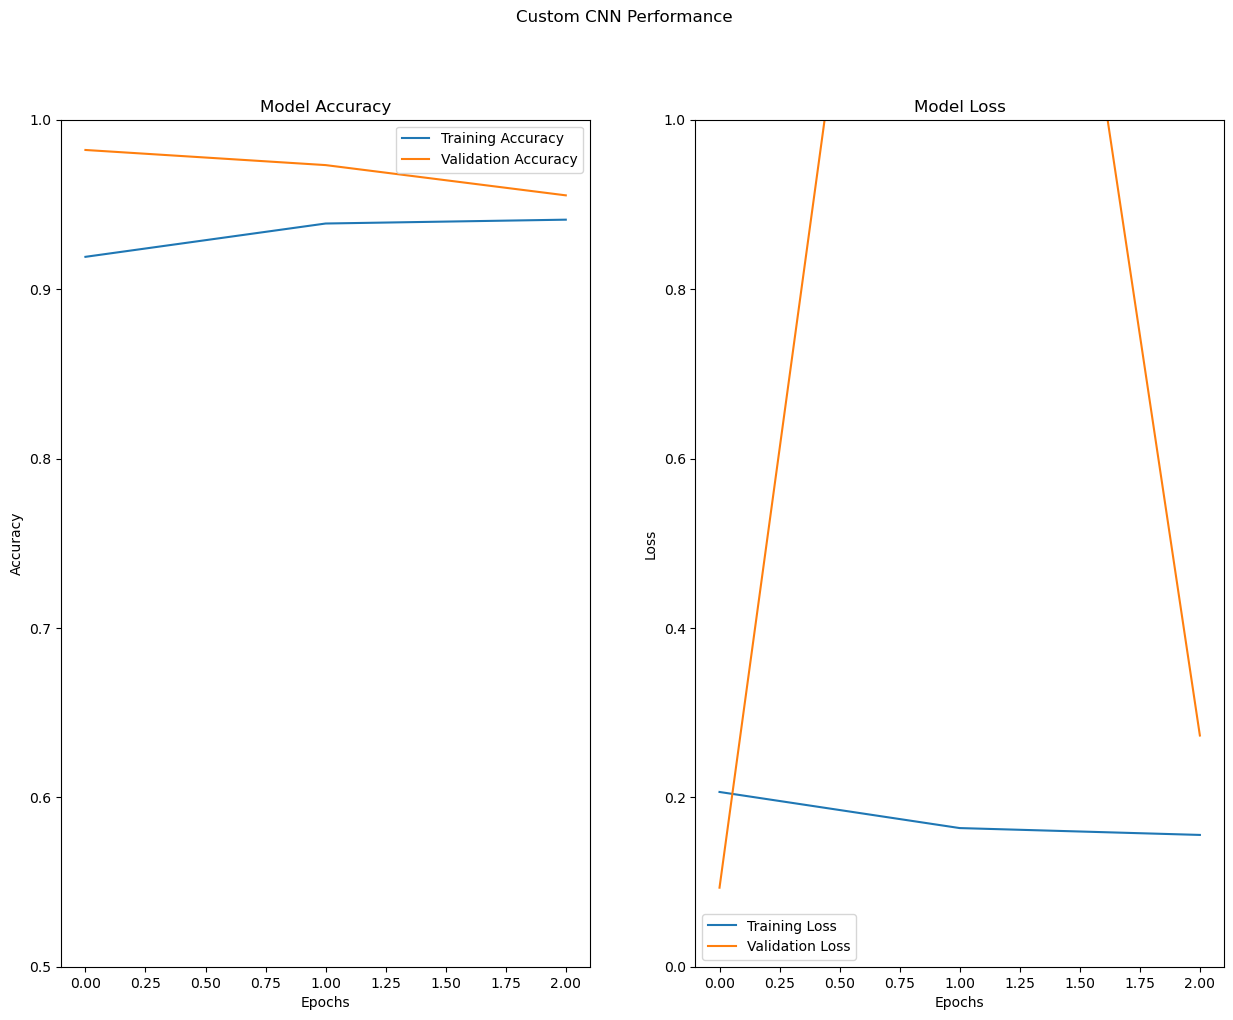

<Figure size 1000x700 with 0 Axes>

In [108]:
import pandas as pd
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,11)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [109]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)  # En yüksek olasılıklı sınıfın indekslerini alır
predictions = predictions.astype(int)  # int tipine dönüştürür
predictions[:5]

4/4 [==============================] - 0s 50ms/step


array([0, 0, 0, 0, 0])

1/1 [==============================] - 0s 75ms/step


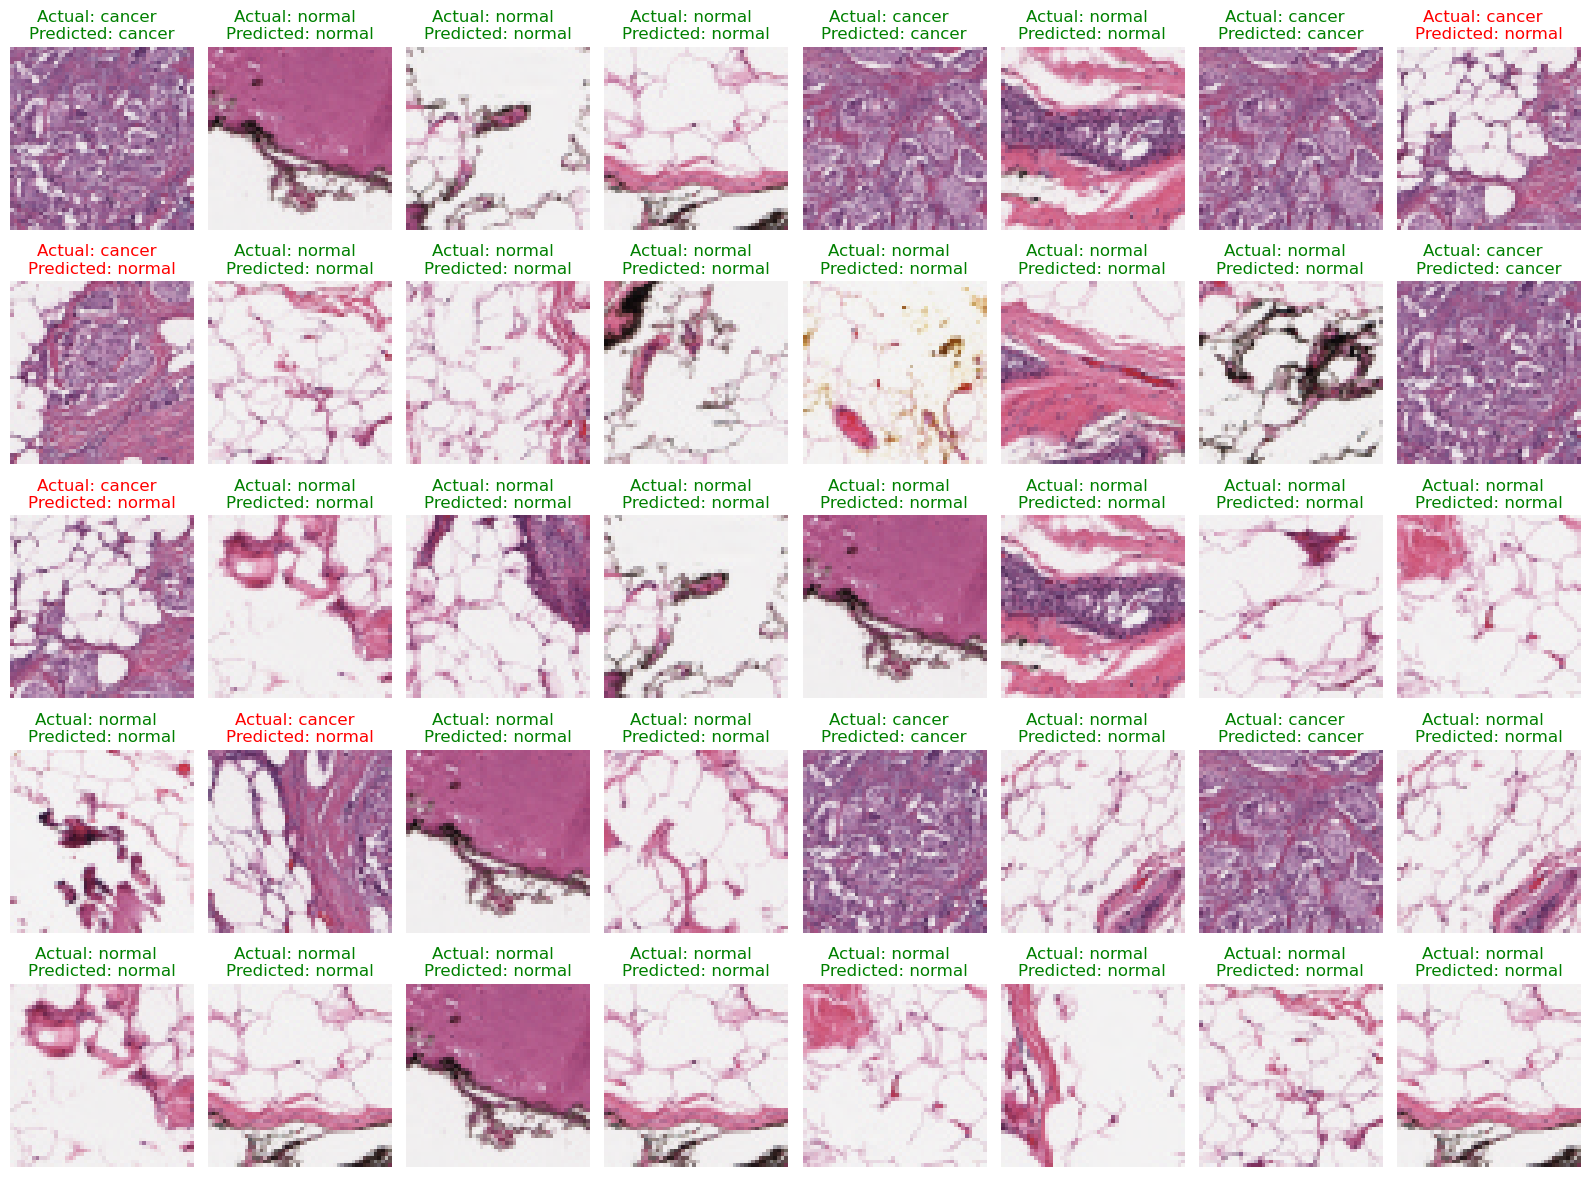

In [126]:
def map_pred(pred):
    return [list(train_dataset.class_indices.keys())[i] for i in pred]

a = 5
b = 8

fig,ax=plt.subplots(a,b)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(a):
    for j in range (b):
        aziz = rn.randint(0,len(val_images)-1)
        ax[i,j].imshow(val_images[aziz])
        if labels[aziz] == predicts[aziz]:
            ax[i,j].set_title('Actual: ' + aziz_label[int(labels[aziz])] + '  \nPredicted: ' + aziz_label[int(predicts[aziz])] , color = 'green')
        else: 
            ax[i,j].set_title('Actual: ' + aziz_label[int(labels[aziz])] + '  \nPredicted: ' +  aziz_label[int(predicts[aziz])] , color = 'red')
        ax[i,j].axis("off")

plt.tight_layout()
plt.savefig('breast_cancer.png')

In [115]:
model.save('breast_histopatology_images.h5')